<a href="https://colab.research.google.com/github/Demon-Sheriff/Linear-Alg_ML_fs/blob/master/SpamClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name = **Anant Shukla**
# R. No. = **23bcs10217**

In [104]:
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 139MB/s]


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
data = pd.read_csv('Spam_finalData.csv')

In [107]:
data.head()

,label_num,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,0.024059,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,0,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,0.000076,0.010306,0.023397,-0.007294,0.063543,0.081119
2,0,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-0.022429,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,1,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,0.000741,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,0,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,0.021673,0.056718,0.006140,0.042217,0.018862,-0.007373


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [109]:
model = LogisticRegression()

In [110]:
X = data.drop(columns=['label_num'])
y = data['label_num']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [112]:
model.fit(X_train, y_train)

LogisticRegression()

In [113]:
y_pred = model.predict(X_test)

In [114]:
positive_pred = y_pred == 1
positive_actual = y_test == 1
negative_pred = y_pred == 0
negative_actual = y_test == 0

In [115]:
y_test = np.array(y_test)

In [116]:
def calc_tp(y_test, y_pred):
  tp = 0
  for i in range(len(y_test)):
    if y_test[i] == 1 and y_pred[i] == 1:
      tp += 1
  return tp

In [117]:
def calc_tn(y_test, y_pred):
  tn = 0
  for i in range(len(y_test)):
    if y_pred[i] == 0 and y_test[i] == 0:
      tn += 1
  return tn

In [118]:
def calc_fp(y_test, y_pred):
  fp = 0
  for i in range(len(y_pred)):
    if y_pred[i] == 1 and y_test[i] == 0:
      fp += 1
  return fp

In [119]:
def calc_fn(y_test, y_pred):
  fn = 0
  for i in range(len(y_pred)):
    if y_pred[i] == 0 and y_test[i] == 1:
      fn += 1
  return fn

In [120]:
# storing TP, TN, FP, FN
tp = calc_tp(y_test, y_pred)
tn = calc_tn(y_test, y_pred)
fp = calc_fp(y_test, y_pred)
fn = calc_fn(y_test, y_pred)

In [121]:
cm = np.zeros((2,2), dtype=np.int64)

In [122]:
cm[0][0] = tn
cm[0][1] = fp
cm[1][0] = fn
cm[1][1] = tp

In [123]:
cm

array([[657,  72],
       [ 21, 285]])

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
cm_lib = confusion_matrix(y_test, y_pred)

In [126]:
cm_lib

array([[657,  72],
       [ 21, 285]])

In [127]:
cm_lib == cm

array([[ True,  True],
       [ True,  True]])

In [128]:
def calc_accuracy(cm):
  return (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

In [129]:
def get_precision(cm):
  return cm[1][1] / (cm[1][1] + cm[0][1])

In [130]:
def get_recall(cm):
  return cm[1][1] / (cm[1][1] + cm[0][0])

In [131]:
def get_f1_score(cm):
  return (2 * get_precision(cm) * get_recall(cm)) / (get_precision(cm) + get_recall(cm))

In [132]:
precision = get_precision(cm)
recall = get_recall(cm)
accuracy = calc_accuracy(cm)
f1 = get_f1_score(cm)

In [133]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report

In [134]:
precision_lib = precision_score(y_test, y_pred)
recall_lib = recall_score(y_test, y_pred)
accuracy_lib = accuracy_score(y_test, y_pred)
f1_lib = f1_score(y_test, y_pred)

In [135]:
print(f"my metrics implementation vs sklearn metrics implementation")
print(f"===================================================================================")
print(f"precision: {precision} vs {precision_lib}")
print(f"recall: {recall} vs {recall_lib}")
print(f"accuracy: {accuracy} vs {accuracy_lib}")
print(f"f1 score: {f1} vs {f1_lib}")

my metrics implementation vs sklearn metrics implementation
precision: 0.7983193277310925 vs 0.7983193277310925
recall: 0.30254777070063693 vs 0.9313725490196079
accuracy: 0.9101449275362319 vs 0.9101449275362319
f1 score: 0.4387990762124711 vs 0.8597285067873304


In [136]:
probs = model.predict_proba(X_test)

In [137]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

precisions, recalls, thresholds = precision_recall_curve(y_test, probs[:, 1])

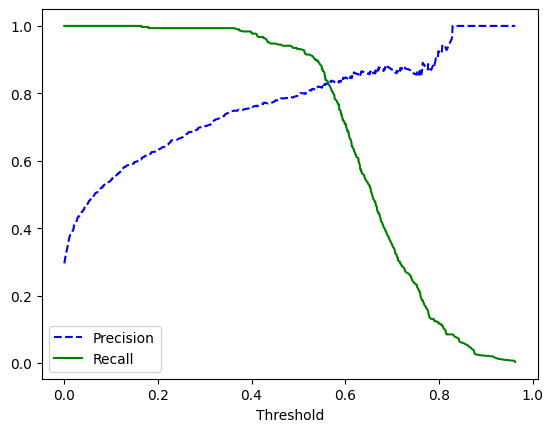

In [138]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend()

In [139]:
# plot roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])

Text(0, 0.5, 'True Positive Rate')

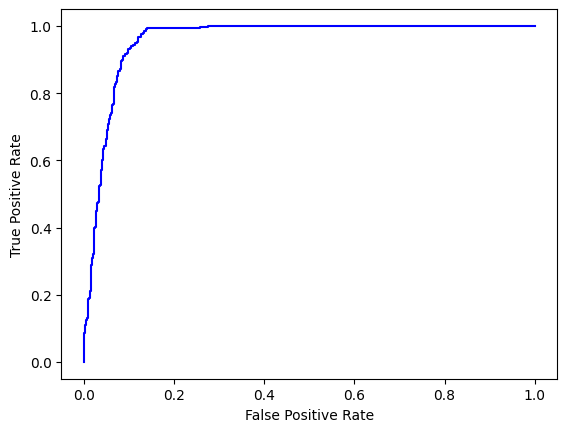

In [140]:
plt.plot(fpr, tpr, 'b-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [141]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_test, probs[:, 1])
print(f"roc_score : {roc_score}")

roc_score : 0.9581528999345509


# Applying weigted sampling for class Majority vs Minority

In [142]:
model_weigted = LogisticRegression(class_weight='balanced', random_state=42)

In [143]:
model_weigted.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [144]:
y_pred_weigted = model_weigted.predict(X_test)

In [145]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [146]:
precision = precision_score(y_test, y_pred_weigted)
recall = recall_score(y_test, y_pred_weigted)
accuracy = accuracy_score(y_test, y_pred_weigted)

In [147]:
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"accuracy: {accuracy}")

precision: 0.7290167865707434
recall: 0.9934640522875817
accuracy: 0.8888888888888888


# Apply SMOTE over-sampling

In [148]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 2943, 1: 1193})
After SMOTE: Counter({0: 2943, 1: 2943})


In [149]:
smote_model = LogisticRegression(random_state=42)

In [150]:
smote_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [151]:
y_pred_resampled = smote_model.predict(X_test)

In [152]:
precision = precision_score(y_test, y_pred_resampled)
recall = recall_score(y_test, y_pred_resampled)
accuracy = accuracy_score(y_test, y_pred_resampled)

In [153]:
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"accuracy: {accuracy}")

precision: 0.7378640776699029
recall: 0.9934640522875817
accuracy: 0.893719806763285


In [154]:
from sklearn.metrics import classification_report
rep = classification_report(y_test, y_pred_resampled)

In [155]:
print(rep)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       729
           1       0.74      0.99      0.85       306

    accuracy                           0.89      1035
   macro avg       0.87      0.92      0.88      1035
weighted avg       0.92      0.89      0.90      1035



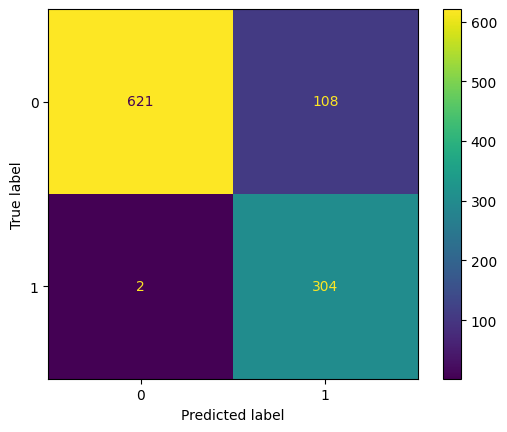

In [156]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_resampled)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=smote_model.classes_)
disp.plot()

In [157]:
probs = smote_model.predict_proba(X_test)

In [158]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

precisions, recalls, thresholds = precision_recall_curve(y_test, probs[:, 1])

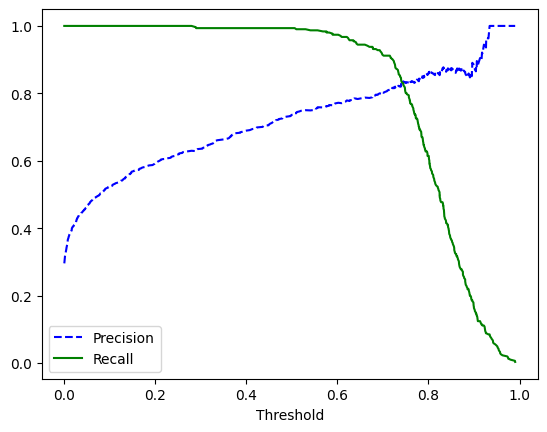

In [159]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend()

In [160]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])

Text(0, 0.5, 'True Positive Rate')

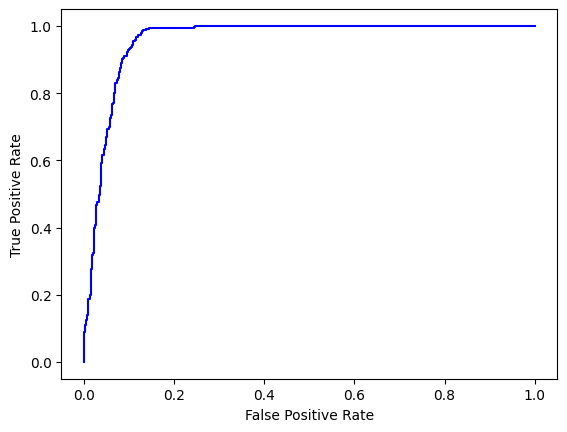

In [161]:
plt.plot(fpr, tpr, 'b-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')